https://github.com/facebook/prophet

Importing all the required libraries

In [1]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

Importing plotly failed. Interactive plots will not work.


Reading data from AirPassengers.csv and loading it onto a Pandas dataframe

In [2]:
data = pd.read_csv('./dataset/airpassengers.csv')

Name the field 'Month' to 'ds'(time series) and '#Passengers' to 'y'(data)

In [3]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['Month'])
df['y'] = data['#Passengers']

In [4]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Initialise a model and fit our dataframe

In [5]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Make future dataframe rows for 5 from the last available date(we are going the forecast 5 years of data)

In [6]:
future = m.make_future_dataframe(periods=12 * 5, freq='M')
future.tail()

,ds
199,1965-07-31
200,1965-08-31
201,1965-09-30
202,1965-10-31
203,1965-11-30


Predict and display the prediction

In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
199,1965-07-31,722.538229,690.816023,750.839336,655.689123,649.262072,661.757889
200,1965-08-31,676.035936,644.635727,706.316422,658.804595,652.210245,664.994090
201,1965-09-30,639.249325,609.233625,669.725904,661.819568,655.103088,668.189157
202,1965-10-31,609.140433,577.415317,638.674465,664.935040,657.966567,671.461141
203,1965-11-30,638.780928,609.992358,668.343631,667.950013,660.753034,674.658562


Display the prediction on graphs

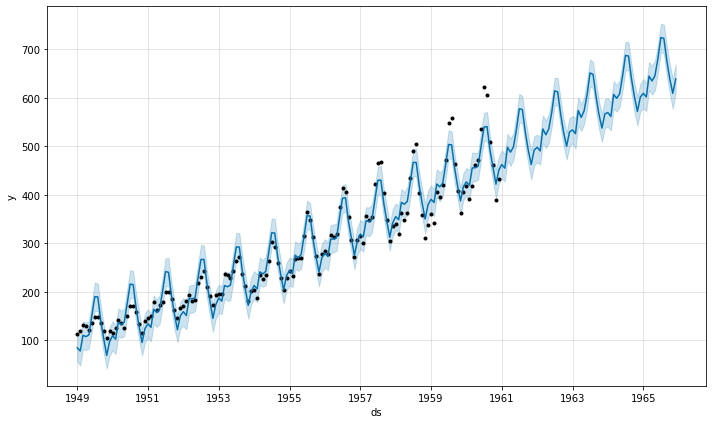

In [8]:
fig1 = m.plot(forecast)

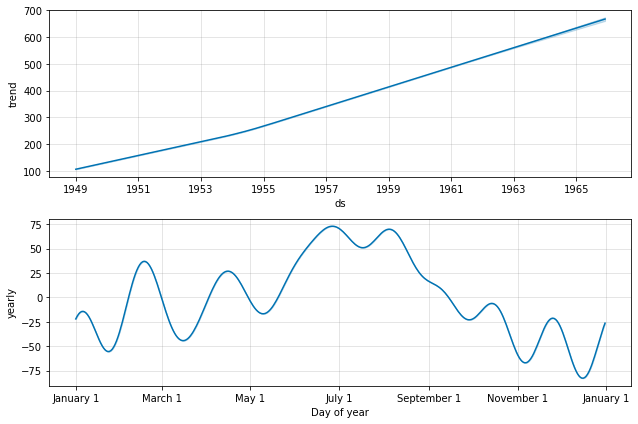

In [9]:
fig2 = m.plot_components(forecast)

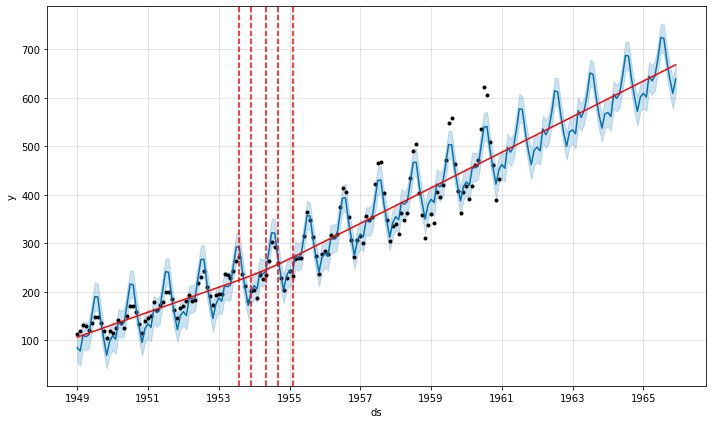

In [10]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)